# Churn Prediction Assessment - Exploratory Data Analysis

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200) # Display all columns

In [48]:
# Load the csv file into a dataframe without the index column and preview it
df = pd.read_csv("../data/raw/Modelo_Clasificacion_Dataset.csv", index_col=[0])
df.head()

,X,numero_de_cliente,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_anual,mcomisiones,mactivos_margen,mpasivos_margen,cant_total_prod,tpaquete1,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolares,Ctitulos,mtitulos,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,mbonos_corporativos,mmonedas_extranjeras,minversiones_otras,cplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,thomebanking,chomebanking_transacciones,cautoservicio,cautoservicio_transacciones,tmovimientos_ultimos90dias,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_mpagominimo,clase_binaria
0,1,4566150,0,1,44,72,3296.69,14455.27,579.66,910.65,1411.60,11,1,0,0,0,0,0,0,0,0,1,1.17,-460.04,2,2574.00,1,17,19451.75,1,18,17091.34,3,73704.79,0,0.0,0.0,0,0.0,0.0,0,0.00,0,1,0,0,0,0,0,1,56580.03,0.0,0,1,68.94,0,0.0,0,0.00,0,0.0,0.00,14,579.66,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,116,0.0,10.0,63180.0,29994.31,32262.86,2830.47,14555.47,59.47,70200.0,0.0,-19632.60,0.00,20130520.0,14555.47,13.0,3837.6,CONTINUA
1,2,4566430,0,0,78,159,1032.18,10141.18,790.58,71.21,135.29,6,1,0,0,0,0,0,0,0,0,1,1.17,6301.72,0,0.00,1,1,174.33,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,833.97,4,790.58,0,0,0.0,0,0.0,0,0.0,1,351.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0,0,17,0.0,10.0,63180.0,182.45,213.46,0.00,-11.55,4.22,70200.0,0.0,-2976.51,62.78,20060210.0,-11.55,2.0,35.1,CONTINUA
2,3,4566445,0,1,64,299,-52.34,4752.64,236.08,-422.18,175.66,7,1,0,0,0,0,0,0,0,0,1,1.17,45.63,0,0.00,1,8,11670.93,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,0.00,6,236.08,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,10,0.0,10.0,176904.0,10367.71,12130.22,0.00,6788.67,0.00,196560.0,0.0,-12753.00,0.00,19960826.0,6788.67,4.0,1977.3,CONTINUA
3,4,4566621,0,1,48,282,485.91,10676.87,1280.47,-1275.18,596.07,8,1,0,0,0,0,0,0,0,0,1,1.17,5429.85,4,4103.69,1,9,9840.21,1,14,12383.23,0,0.00,0,0.0,0.0,0,0.0,0.0,3,10509.33,0,0,0,0,0,0,0,0,0.00,0.0,0,4,5303.31,0,0.0,0,0.00,2,2460.0,833.97,18,1280.47,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,78,0,0,85,0.0,10.0,176904.0,6754.10,7433.72,468.57,2946.70,10.51,196560.0,0.0,-3685.76,0.00,20150204.0,2946.70,5.0,573.3,CONTINUA
5,6,4566907,0,1,45,171,5878.27,24298.75,64.38,22.11,4947.03,9,1,0,0,0,0,0,0,0,0,1,1.17,563006.87,10,4313.45,1,2,1496.03,1,0,0.00,0,0.00,1,351000.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,7,2171.89,1,339.3,0.00,12,64.38,0,0,0.0,0,0.0,0,0.0,2,16160.54,5,4797.0,0

In [ ]:
# Drop the first column 'X' that looks like an unnecessary index
# Dropear ID de cliente
df = df.drop('X',axis=1)
df.head()

,numero_de_cliente,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_anual,mcomisiones,mactivos_margen,mpasivos_margen,cant_total_prod,tpaquete1,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolares,Ctitulos,mtitulos,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,mbonos_corporativos,mmonedas_extranjeras,minversiones_otras,cplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,thomebanking,chomebanking_transacciones,cautoservicio,cautoservicio_transacciones,tmovimientos_ultimos90dias,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_mpagominimo,clase_binaria
0,4566150,0,1,44,72,3296.69,14455.27,579.66,910.65,1411.60,11,1,0,0,0,0,0,0,0,0,1,1.17,-460.04,2,2574.00,1,17,19451.75,1,18,17091.34,3,73704.79,0,0.0,0.0,0,0.0,0.0,0,0.00,0,1,0,0,0,0,0,1,56580.03,0.0,0,1,68.94,0,0.0,0,0.00,0,0.0,0.00,14,579.66,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,116,0.0,10.0,63180.0,29994.31,32262.86,2830.47,14555.47,59.47,70200.0,0.0,-19632.60,0.00,20130520.0,14555.47,13.0,3837.6,CONTINUA
1,4566430,0,0,78,159,1032.18,10141.18,790.58,71.21,135.29,6,1,0,0,0,0,0,0,0,0,1,1.17,6301.72,0,0.00,1,1,174.33,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,833.97,4,790.58,0,0,0.0,0,0.0,0,0.0,1,351.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0,0,17,0.0,10.0,63180.0,182.45,213.46,0.00,-11.55,4.22,70200.0,0.0,-2976.51,62.78,20060210.0,-11.55,2.0,35.1,CONTINUA
2,4566445,0,1,64,299,-52.34,4752.64,236.08,-422.18,175.66,7,1,0,0,0,0,0,0,0,0,1,1.17,45.63,0,0.00,1,8,11670.93,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,0.00,6,236.08,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,10,0.0,10.0,176904.0,10367.71,12130.22,0.00,6788.67,0.00,196560.0,0.0,-12753.00,0.00,19960826.0,6788.67,4.0,1977.3,CONTINUA
3,4566621,0,1,48,282,485.91,10676.87,1280.47,-1275.18,596.07,8,1,0,0,0,0,0,0,0,0,1,1.17,5429.85,4,4103.69,1,9,9840.21,1,14,12383.23,0,0.00,0,0.0,0.0,0,0.0,0.0,3,10509.33,0,0,0,0,0,0,0,0,0.00,0.0,0,4,5303.31,0,0.0,0,0.00,2,2460.0,833.97,18,1280.47,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,78,0,0,85,0.0,10.0,176904.0,6754.10,7433.72,468.57,2946.70,10.51,196560.0,0.0,-3685.76,0.00,20150204.0,2946.70,5.0,573.3,CONTINUA
5,4566907,0,1,45,171,5878.27,24298.75,64.38,22.11,4947.03,9,1,0,0,0,0,0,0,0,0,1,1.17,563006.87,10,4313.45,1,2,1496.03,1,0,0.00,0,0.00,1,351000.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,7,2171.89,1,339.3,0.00,12,64.38,0,0,0.0,0,0.0,0,0.0,2,16160.54,5,4797.0,0,0.0,0,0.0,0

In [30]:
# Rename columns: lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,numero_de_cliente,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_anual,mcomisiones,mactivos_margen,mpasivos_margen,cant_total_prod,tpaquete1,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,mdescubierto_preacordado,mcuentas_saldo,ctarjeta_debito_transacciones,mautoservicio,ctarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ctarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,cfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolares,ctitulos,mtitulos,cseguro_auto,cseguro_vivienda,cseguro_accidentes_personales,ccaja_seguridad,mbonos_corporativos,mmonedas_extranjeras,minversiones_otras,cplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,ccuenta_debitos_automaticos,mcuenta_debitos_automaticos,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,cpagodeservicios,mpagodeservicios,cpagomiscuentas,mpagomiscuentas,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,ccambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,thomebanking,chomebanking_transacciones,cautoservicio,cautoservicio_transacciones,tmovimientos_ultimos90dias,visa_marca_atraso,visa_cuenta_estado,visa_mfinanciacion_limite,visa_msaldototal,visa_msaldopesos,visa_msaldodolares,visa_mconsumospesos,visa_mconsumosdolares,visa_mlimitecompra,visa_mpagado,visa_mpagospesos,visa_mpagosdolares,visa_fechaalta,visa_mconsumototal,visa_cconsumos,visa_mpagominimo,clase_binaria
0,4566150,0,1,44,72,3296.69,14455.27,579.66,910.65,1411.60,11,1,0,0,0,0,0,0,0,0,1,1.17,-460.04,2,2574.00,1,17,19451.75,1,18,17091.34,3,73704.79,0,0.0,0.0,0,0.0,0.0,0,0.00,0,1,0,0,0,0,0,1,56580.03,0.0,0,1,68.94,0,0.0,0,0.00,0,0.0,0.00,14,579.66,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0,116,0.0,10.0,63180.0,29994.31,32262.86,2830.47,14555.47,59.47,70200.0,0.0,-19632.60,0.00,2013-05-20,14555.47,13.0,3837.6,0
1,4566430,0,0,78,159,1032.18,10141.18,790.58,71.21,135.29,6,1,0,0,0,0,0,0,0,0,1,1.17,6301.72,0,0.00,1,1,174.33,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,833.97,4,790.58,0,0,0.0,0,0.0,0,0.0,1,351.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1,0,0,17,0.0,10.0,63180.0,182.45,213.46,0.00,-11.55,4.22,70200.0,0.0,-2976.51,62.78,2006-02-10,-11.55,2.0,35.1,0
2,4566445,0,1,64,299,-52.34,4752.64,236.08,-422.18,175.66,7,1,0,0,0,0,0,0,0,0,1,1.17,45.63,0,0.00,1,8,11670.93,1,0,0.00,0,0.00,0,0.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,0,0.00,0,0.0,0.00,6,236.08,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0,0,0,10,0.0,10.0,176904.0,10367.71,12130.22,0.00,6788.67,0.00,196560.0,0.0,-12753.00,0.00,1996-08-26,6788.67,4.0,1977.3,0
3,4566621,0,1,48,282,485.91,10676.87,1280.47,-1275.18,596.07,8,1,0,0,0,0,0,0,0,0,1,1.17,5429.85,4,4103.69,1,9,9840.21,1,14,12383.23,0,0.00,0,0.0,0.0,0,0.0,0.0,3,10509.33,0,0,0,0,0,0,0,0,0.00,0.0,0,4,5303.31,0,0.0,0,0.00,2,2460.0,833.97,18,1280.47,0,0,0.0,0,0.0,0,0.0,0,0.00,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,78,0,0,85,0.0,10.0,176904.0,6754.10,7433.72,468.57,2946.70,10.51,196560.0,0.0,-3685.76,0.00,2015-02-04,2946.70,5.0,573.3,0
5,4566907,0,1,45,171,5878.27,24298.75,64.38,22.11,4947.03,9,1,0,0,0,0,0,0,0,0,1,1.17,563006.87,10,4313.45,1,2,1496.03,1,0,0.00,0,0.00,1,351000.0,0.0,0,0.0,0.0,0,0.00,0,0,0,0,0,0,0,0,0.00,0.0,0,0,0.00,0,0.0,7,2171.89,1,339.3,0.00,12,64.38,0,0,0.0,0,0.0,0,0.0,2,16160.54,5,4797.0,0,0.0,0,0.0,0,0.0,0,0.0,1,4,0,0,94,0.0,10

In [10]:
# Convert target variable into numeric format that is more suitable for most machine learning models
df['clase_binaria'] = df['clase_binaria'].map({'BAJA': 1, 'CONTINUA': 0})
print(df['clase_binaria'].unique())

[0 1]


In [11]:
# Preview dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170722 entries, 0 to 189593
Columns: 104 entries, numero_de_cliente to clase_binaria
dtypes: float64(49), int64(55)
memory usage: 136.8 MB


In [33]:
# Check column names and data types
# Temporarily display the full list of columns
pd.set_option('display.max_rows', None)  # Show all rows
print(df.dtypes)

# Reset to default after viewing
# pd.reset_option('display.max_rows')

numero_de_cliente                              int64
cliente_vip                                    int64
internet                                       int64
cliente_edad                                   int64
cliente_antiguedad                             int64
mrentabilidad                                float64
mrentabilidad_anual                          float64
mcomisiones                                  float64
mactivos_margen                              float64
mpasivos_margen                              float64
cant_total_prod                                int64
tpaquete1                                      int64
tpaquete2                                      int64
tpaquete3                                      int64
tpaquete4                                      int64
tpaquete5                                      int64
tpaquete6                                      int64
tpaquete7                                      int64
tpaquete8                                     

In [49]:
# Check distinct values in some columns to figure out the correct data type
unique_values = df['tcuentas'].unique()
print(unique_values)

[1 2]


In [14]:
# Change Visa_fechaalta data type to datetime.
# Ensure the column is treated as an integer (to remove decimal points), 
# but handle nulls properly by using 'errors' parameter if necessary.
df['Visa_fechaalta'] = pd.to_numeric(df['Visa_fechaalta'], errors='coerce')

# Convert to datetime, treating NaNs (null values) as valid dates
df['Visa_fechaalta'] = pd.to_datetime(df['Visa_fechaalta'], format='%Y%m%d', errors='coerce')
# Verify the changes

print(df['Visa_fechaalta'].head())


0   2013-05-20
1   2006-02-10
2   1996-08-26
3   2015-02-04
5   2005-02-03
Name: Visa_fechaalta, dtype: datetime64[ns]


In [19]:
# Change categorical fields into category data type instead of str since it's more efficient
# Metadata dictionary mapping columns to data types
# fields that start with a "t" (tiene/has)
# fields that start with a "c" (cantidad/quantity)
# fields that start with a "m" (monto/amount)

metadata = {
    "tcuentas": "category",
    "Visa_cuenta_estado": "category"
}

# Update the data types in the DataFrame
for column, dtype in metadata.items():
    if column in df.columns:
        try:
            df[column] = df[column].astype(dtype)
        except ValueError:
            print(f"Error converting column {column} to {dtype}")

# Check the updated DataFrame
# Temporarily display the full list of columns
pd.set_option('display.max_rows', None)  # Show all rows
print(df.dtypes)

# Reset to default after viewing
pd.reset_option('display.max_rows')


numero_de_cliente                              int64
cliente_vip                                    int64
internet                                       int64
cliente_edad                                   int64
cliente_antiguedad                             int64
mrentabilidad                                float64
mrentabilidad_anual                          float64
mcomisiones                                  float64
mactivos_margen                              float64
mpasivos_margen                              float64
cant_total_prod                                int64
tpaquete1                                      int64
tpaquete2                                      int64
tpaquete3                                      int64
tpaquete4                                      int64
tpaquete5                                      int64
tpaquete6                                      int64
tpaquete7                                      int64
tpaquete8                                     

In [52]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
X                                         0
numero_de_cliente                         0
cliente_vip                               0
internet                                  0
cliente_edad                              0
cliente_antiguedad                        0
mrentabilidad                             0
mrentabilidad_anual                       0
mcomisiones                               0
mactivos_margen                           0
mpasivos_margen                           0
cant_total_prod                           0
tpaquete1                                 0
tpaquete2                                 0
tpaquete3                                 0
tpaquete4                                 0
tpaquete5                                 0
tpaquete6                                 0
tpaquete7                                 0
tpaquete8                                 0
tpaquete9                                 0
tcuentas                                  0
mdescubierto_pre

In [53]:
# Dropear las 6101 y convertir a 0 las 21k

In [54]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [55]:
# Check for duplicate rows in subsets
duplicates = df.duplicated(subset=['numero_de_cliente']).sum()
print(f"Number of duplicate rows in subset: {duplicates}")

Number of duplicate rows in subset: 0



Distribution of target variable (clase_binaria):
clase_binaria
CONTINUA    168887
BAJA          1835
Name: count, dtype: int64


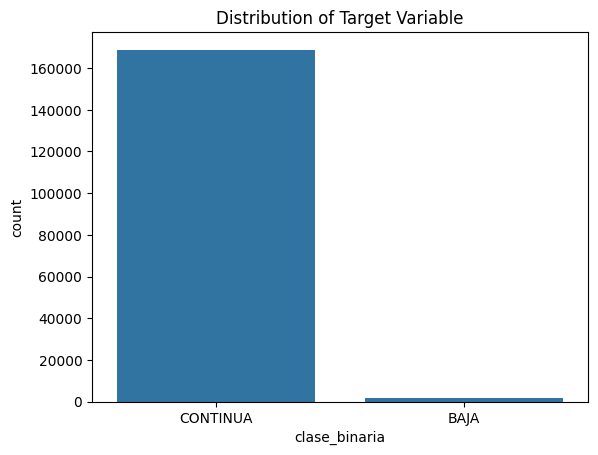

In [62]:
# Checking the distribution of the target variable
# The dataset appears to be unbalanced
target_column = 'clase_binaria'
if target_column in df.columns:
    print(f"\nDistribution of target variable ({target_column}):")
    print(df[target_column].value_counts())
    sns.countplot(data=df, x=target_column)
    plt.title("Distribution of Target Variable")
    plt.show()
else:
    print(f"\nTarget column '{target_column}' not found in the dataset. Please check the column name.")


In [ ]:
# Hay que balancear el dataset

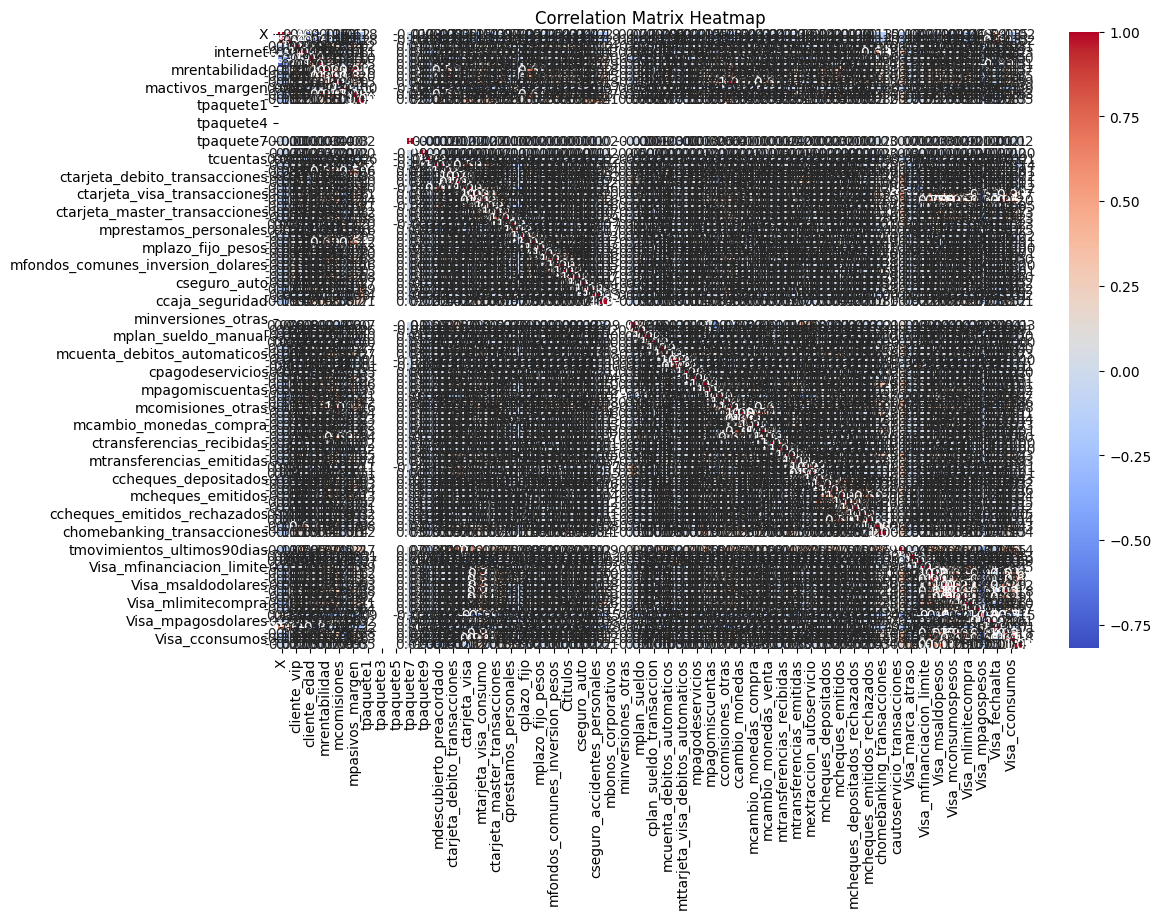

In [57]:
# Correlation matrix heatmap
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the numeric columns
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


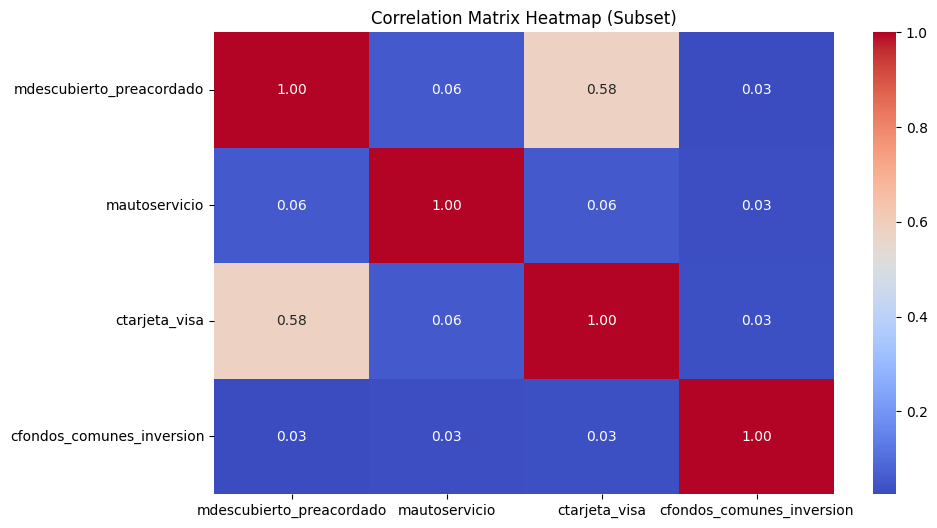

In [61]:
# As the heatmap looks very cluttered I will select a subset of key features (need to search for potentially correlated variables)
# Example: Subset of numerical columns for better visualization
important_columns = ['mdescubierto_preacordado', 'mautoservicio', 'ctarjeta_visa', 'cfondos_comunes_inversion']  # Specify relevant columns
numeric_df_subset = numeric_df[important_columns]

# Calculate and plot correlation matrix for the subset
corr = numeric_df_subset.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap (Subset)")
plt.show()



Distribution of tcuentas:


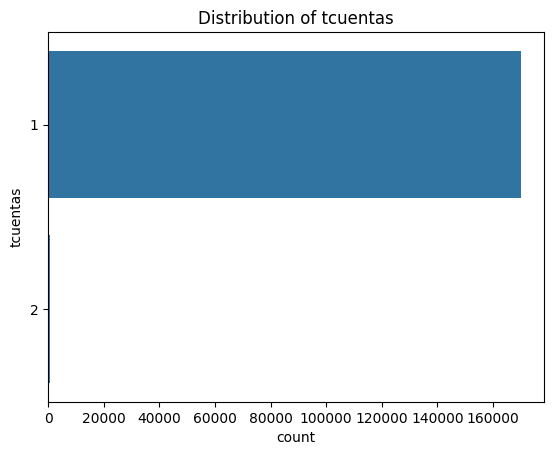


Distribution of Visa_cuenta_estado:


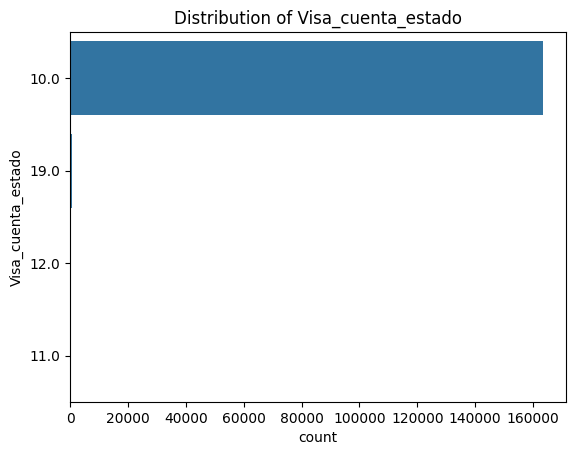

In [76]:
# Categorical feature analysis
categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    if col != target_column:  # Avoid plotting the target column here
        print(f"\nDistribution of {col}:")
        sns.countplot(data=df, y=col, order=df[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.show()

In [ ]:
# Feature Importance
from sklearn.ensemble import RandomForestClassifier
numeric_cols = df.select_dtypes(include=np.number).columns
target_column = 'clase_binaria'
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Use the variable target_column to access the column in the DataFrame
model.fit(df[numeric_cols], df[target_column])

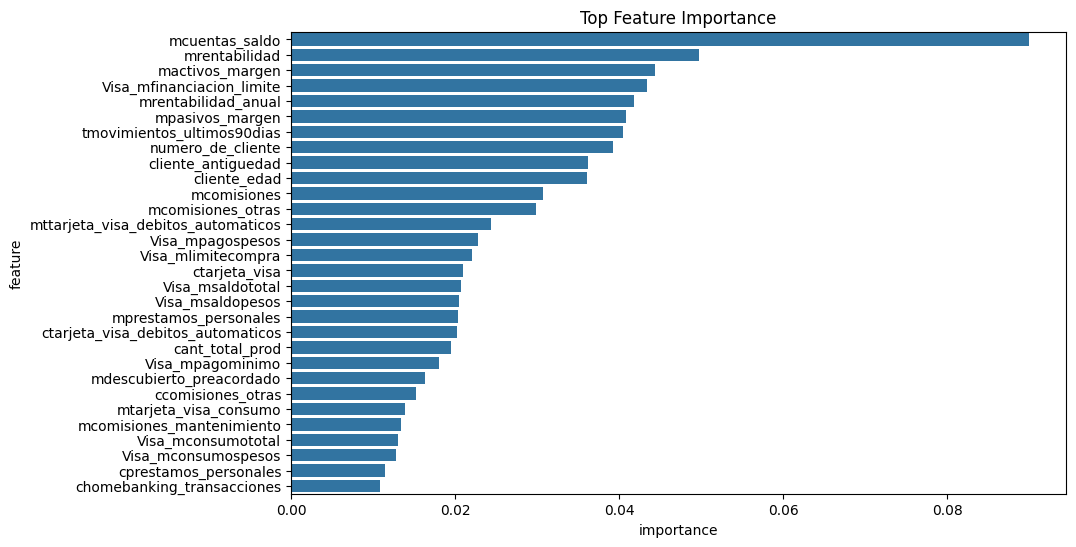

In [52]:
# Get feature importances
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': numeric_cols,
    'importance': feature_importances
})
# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
# Limit the number of features to display
top_n = 30
feature_importance_df = feature_importance_df.head(top_n)
# Plot the top features
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Top Feature Importance')
plt.show()